In [1]:
from cgitb import text
from types import new_class
import requests
from bs4 import BeautifulSoup
import json
import re
import sys
import time, random
import pandas as pd

import pymysql
conn = pymysql.connect(host='localhost',
                       port=3306,
                       user='social',
                       passwd='1234',
                       db='wordcloud',
                       charset='utf8')

OperationalError: (1045, "Access denied for user 'social'@'localhost' (using password: YES)")

In [8]:
header = {
    'User-Agent' : 'Mozilla/5.0 (Window NT 10.0; Win64; x64) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

def get_news(news_url):
    news_detail = []
    print(news_url)
    req = requests.get(news_url, headers=header)
    soup = BeautifulSoup(req.content, 'html.parser')

    _text = soup.select('.story-text__paragraph   ')[0].get_text().replace('\n', " ")
    text = _text.replace("// flahs 오류를 우회하기 위함 함수 추가 function _flash_removeCallback() {}", "" )
    news_detail.append(text.strip())

    return news_detail

news1 = get_news('https://www.politico.com/story/2017/01/full-text-donald-trump-inauguration-speech-transcript-233907')
print(news1)

https://www.politico.com/story/2017/01/full-text-donald-trump-inauguration-speech-transcript-233907
['President Donald Trump’s full inaugural address remarks.Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world, thank you. We the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together we will determine the course of America, and the world, for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done. Every four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you. Today’s ceremony, however, has very special meaning, because today we are not merely transferring power from one admini

In [20]:
cur = conn.cursor()
cur.execute('INSERT INTO wordCloud VALUES(%s)',(news1[0]))  
conn.commit()

NameError: name 'conn' is not defined

In [9]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [28]:
words = news1[0].lower()
tokenizer = RegexpTokenizer('[\w]+')
tokens = tokenizer.tokenize(words)

stop_words = stopwords.words('english')
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i) > 1]

In [29]:
pd.Series(stopped_tokens2).value_counts().head(10)

america      20
american     11
people       10
nation        9
country       9
one           8
every         7
president     6
back          6
across        6
dtype: int64

In [30]:
import os
java_home = os.environ.get('JAVA_HOME', None)
if not java_home:
    os.environ['JAVA_HOME'] = java_path
else:
    print(java_home)

/usr/lib/jvm/java-8-openjdk-amd64


In [32]:
from wordcloud import WordCloud
from collections import Counter

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width=800,
    height=800,
    background_color="white"
)

In [33]:
count = Counter(stopped_tokens2)
wordcloud = wordcloud.generate_from_frequencies(count)

In [34]:
array=wordcloud.to_array()

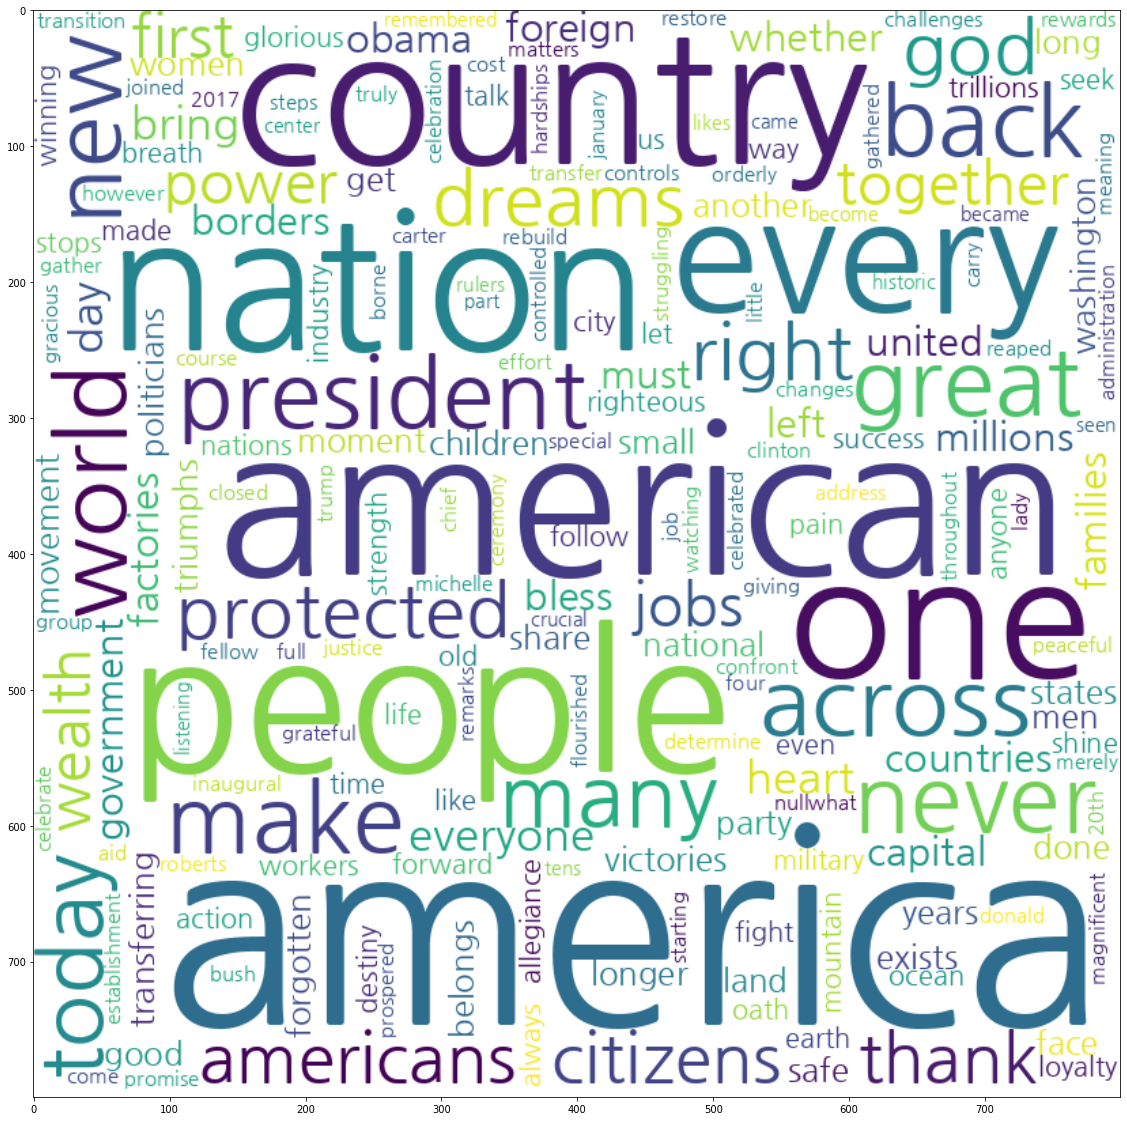

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')